# Introduction - Business Problem

After finishing our Computer Science studies at Berkeley, we had a great idea and developed a prototype of a pair of augmented reality glasses with full 5G connectivity, bluetooth and a GPS chipset.
We avoided to include any camera on it (as Google Glasses) and focusing on social media streaming (as the first version of Google ones) or focusing in enterprises (like the latest one).
The reason is that we have identified geolocation as our niche market and we want to focus on it.

In the process of creating the prototype, we did some proof of concepts with different APIs and we observed that there are lot of functionalities we can offer to the users. 
Some examples for which we implemented proof of concepts:

* Strava integration - Strava is the most used APP by runners around the world and after some exploratory testing with the Strava API, we realized our glasses are able to:
    + show to the user very useful data while he or she is running, like: velocity, minutes per mile, distance, heart rate, etc...
    + show them routes previously defined in their user profile or the most popular routes around them
    + show the user "kudos" (cheers) given by their friends in real time


* Google Maps integration - Our glasses are able to integrate with the Google Maps API and we can implement very interesting features:
    + navigate through maps while driving without needing to take the eyes off the road
    + showing interesting/historical points in a city (very useful for tourists)
    + showing interesting restaurants/venues around them when required


* ESPN Sports live stats integration - Our glasses are able to show live sports stats/scores through the ESPN API
    + show live scores for matches of the major leagues in the USA (NFL, NBA, NHL and MLB)
    + show live stats when attending to any event like a Lakers or GSW game
    + show time differences between different cars in a Nascar race


* Disney Parks - As ESPN is part of the Disney emporium, they were impressed by our glasses and ask us to implement as well:
    + navigation through Disney parks, starting with Magic Kingdom in Orland as a proof of concept
    + real time stats on waiting times for the park attractions, so the users can optimize their time in the park



So, after creating our prototype, we had several appointments with some of the biggest tech companies (including these 3 ones, plus Apple, Microsoft, etc...) in order to show them what our glasses are capable of.
Almost all of them were very interested and after a funding round, some of them decided to invest in our project and create a partnership with us in order to develop the final product and implement lots of features in them.
    

We have launched a brand new start-up company named *Aviato GeoGlasses Inc* and collected 20 millions from our 4 main investors (Apple, Strava, Google, Disney-ESPN) in exchange of 5% of the shares of the company for each one of them.

Now that we have the necessary funding, our next step is to hire 30 engineers, 10 marketing people and additional 10 support staff people (Human Resources, legal advisors, etc...).
However, before doing that, we need to **look for the best place where our offices will be located** and that is the purpose of this work.

In order to define where we think is the best place to locate our offices, we have done an brainstorming session and came to the following conclusion:

* we want to locate our offices in the San Francisco Bay Area
    + there is a lot of personal talent around the bay (graduates from Berkeley, Standford, etc... and engineers working in other tech companies) so we want to attract that people
    + most of our partners are located around this area
    + there are lots of potentials new partners (big technological companies and lots of other startups) around the bay

As we want to accelerate this process and start hiring people and working in the final product as soon as possible, we have decided that we don't want to spend lots of time visiting all the cities around the bay (101 municipalities) searching for the best city/town to locate our offices.

As we have some expertice working as Data scientists, we are going to use our knowledge to reduce the list of possible locations to only a bunch of locations around the bay and we will only need to visit the list of final candidates.

So, we have done another brainstorming session in order to clarify which are the requirements we are looking for.
As a result of that session, we have come to the following requirements for the location:

* we want that our offices are located around the center of the selected city
    + want to feel the "vibe" of the city 
    + avoid ugly and noisy industrial parks
    + avoid residential neighbourhoods where there are no venues around (restaurants, gyms, etc...) 


* we want to locate our office in a town with a reasonable population number
    + want to avoid very busy/turistic cities with a big population like San Francisco
    + at same time we want to avoid very little towns with a very small population
    
    
* we believe our employees will be more creative and efficient if they have interesting venues around
    + we don't believe that working 10 hours without interacting with anybody is a good practice
    + will look for places with restaurants around, so our employees can go for a lunch and socialize
    + will look for places with gyms or other sports facilities around
    + not mandatory, but nice to have, some bars around so our employees can go for a drink after work with other colleagues


* we are looking for cities that have some train or bus station around the city center
    + in order to facilitate our employees to come to the office from other cities around the bay


* in case there are too many cities fulfilling the previous requirements, we will use as a filter having other kinds of venues around:
    + parks, schools, cinemas, shopping malls, etc...
    + can attract more people to our company and maybe they decided to rent/buy an apartment/house and live in the selected city


# Data adquisition

Now that have defined our problem to solve, we need to start looking for the data required and the data sources that will provide it.

## List of municipalities around SF Bay area

As a first step, we need a dataset containing the list of municipalities around the San Francisco Bay Area.  
We can find that information in the Wikipedia: https://en.wikipedia.org/wiki/List_of_cities_and_towns_in_the_San_Francisco_Bay_Area

As the information is presented in a table (HTML format), we can use Pandas and Beautiful Soup functionalities in order to retrieve the information.  
That table will contain:
* Name
* Type (City, Town, etc...)
* County
* Population
* Land Area
* Incorporation date

In [1]:
# The code was removed by Watson Studio for sharing.

In [2]:
!pip install folium==0.5.0
import folium # plotting library

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 79 kB 7.7 MB/s  eta 0:00:01
  Created wheel for folium: filename=folium-0.5.0-py3-none-any.whl size=76240 sha256=a74d5f99b895932b22820ff40fa0a4572c56c7ac3dc806bc80aff82df938710b
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/b2/2f/2c/109e446b990d663ea5ce9b078b5e7c1a9c45cca91f377080f8
Successfully built folium


In [3]:
#Download the html from the URL and convert into a BeautifulSoup object
url='https://en.wikipedia.org/wiki/List_of_cities_and_towns_in_the_San_Francisco_Bay_Area'
html_data  = requests.get(url).text 
soup_object = BeautifulSoup(html_data,"html5lib")  # create a soup object using the variable 'html_data'

In [4]:
soup_object = BeautifulSoup(html_data,"html5lib")  # create a soup object using the variable 'html_data'
#Extract the tables/table
wiki_tables = soup_object.find_all('table')

#Use pandas to transform the table into a dataframe
wiki_df = pd.read_html(str(wiki_tables[1]),flavor='bs4')[0]

In [5]:
#Need to rename the headers, in the original table there are 2 levels
wiki_df.columns = ['Name','Type','County','Population','Land area - sq mi','Land area - km2','Incorporated']
wiki_df.head()

,Name,Type,County,Population,Land area - sq mi,Land area - km2,Incorporated
0,Alameda,City,Alameda,73812,10.61,27.5,"April 19, 1854"
1,Albany,City,Alameda,18539,1.79,4.6,"September 22, 1908"
2,American Canyon,City,Napa,19454,4.84,12.5,"January 1, 1992"
3,Antioch,City,Contra Costa,102372,28.35,73.4,"February 6, 1872"
4,Atherton,Town,San Mateo,6914,5.02,13.0,"September 12, 1923"


As we are only interested in the name of the city/town and the population, we are going to remove the rest of the columns (except for county column, we will see later that we need that one as 
well).

Additionally, we are going to apply the "reasonable population" filter that we defined as a requisite in our analysis.
In concrete, we are are going to remove from our data:
* Big cities, with population bigger than 120000 citizens
* Small towns, with population less than 20000 citizens

In [6]:
wiki_df.drop(['Type','Land area - sq mi','Land area - km2','Incorporated'],axis=1,inplace=True)

In [7]:
wiki_df.head()

,Name,County,Population
0,Alameda,Alameda,73812
1,Albany,Alameda,18539
2,American Canyon,Napa,19454
3,Antioch,Contra Costa,102372
4,Atherton,San Mateo,6914


In [8]:
wiki_df_final = wiki_df[(wiki_df['Population']>20000) & (wiki_df['Population']<150000)]
wiki_df_final.reset_index(inplace=True)

In [9]:
wiki_df_final.drop(['index'],axis=1,inplace=True)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [10]:
print(wiki_df_final.shape)
wiki_df_final.head()

(60, 3)


,Name,County,Population
0,Alameda,Alameda,73812
1,Antioch,Contra Costa,102372
2,Belmont,San Mateo,25835
3,Benicia,Solano,26997
4,Berkeley,Alameda,112580


As we can observe, with the population filter, we have reduced the number of municipalities that could fit our requirements from the original 101 municipalities into 60.

Now we will continue the analysis in order to refine the list and reduce the number of potential candidates.

## Longitude and Latitude for each city

We have decided to use the FourSquare API as the service that will provide the list of venues around the city centers of the selected cities.
In order to be able to use that API, we first need to retrieve the coordinates for each city center.

We are going to use the Geopy-Nominatim Python package in order to get those longitudes and latitudes required.
We will loop through the cities and retrieve the coordinates for each one of them.

In [11]:
!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [12]:
geolocator = Nominatim(user_agent="SFBay_Explorer")
coordinates_df = pd.DataFrame(columns=['Name', 'County','Latitude', 'Longitude'])

for name,county in zip(wiki_df_final['Name'], wiki_df_final['County']):
    #In order to create the address, add state name (California) to the town name
    address = name + ' ,California'
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    coordinates_df = coordinates_df.append({'Name': name, 'County':county, 'Latitude' : latitude, 'Longitude': longitude}, ignore_index=True)
    print('The geograpical coordinate of {} are {}, {}.'.format(name, latitude, longitude))

coordinates_df

The geograpical coordinate of Alameda are 37.6090291, -121.899142.
The geograpical coordinate of Antioch are 38.0049214, -121.805789.
The geograpical coordinate of Belmont are 37.5164926, -122.2941914.
The geograpical coordinate of Benicia are 38.049365, -122.1585777.
The geograpical coordinate of Berkeley are 37.8708393, -122.2728639.
The geograpical coordinate of Brentwood are 37.9317766, -121.6960266.
The geograpical coordinate of Burlingame are 37.5841026, -122.3660825.
The geograpical coordinate of Campbell are 37.2870626, -121.9448818.
The geograpical coordinate of Concord are 37.9768525, -122.0335624.
The geograpical coordinate of Cupertino are 37.3228934, -122.0322895.
The geograpical coordinate of Daly City are 37.6904826, -122.4726708.
The geograpical coordinate of Danville are 37.8215929, -121.9999606.
The geograpical coordinate of Dublin are 37.7021521, -121.9357918.
The geograpical coordinate of East Palo Alto are 37.4688273, -122.1410751.
The geograpical coordinate of El 

,Name,County,Latitude,Longitude
0,Alameda,Alameda,37.609029,-121.899142
1,Antioch,Contra Costa,38.004921,-121.805789
2,Belmont,San Mateo,37.516493,-122.294191
3,Benicia,Solano,38.049365,-122.158578
4,Berkeley,Alameda,37.870839,-122.272864
5,Brentwood,Contra Costa,37.931777,-121.696027
6,Burlingame,San Mateo,37.584103,-122.366083
7,Campbell,Santa Clara,37.287063,-121.944882
8,Concord,Contra Costa,37.976852,-122.033562
9,Cupertino,Santa Clara,37.322893,-122.032290


As we want to make sure that the coordinates for each town corresponds to the city center, we are going to print in the San Francisco Bay map each city center location with a marker.
In order to do that, we will use Folium package for Python.

In [13]:
#Create the map centered in the San Francisco Bay
bay_address = 'San Francisco Bay, California'
bay_location = geolocator.geocode(bay_address)
bay_latitude = bay_location.latitude
bay_longitude = bay_location.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(bay_address, bay_latitude, bay_longitude))
SFBay_map = folium.Map(location=[bay_latitude, bay_longitude], zoom_start=9)

#Add markers for each location
for lat, lng, name, county in zip(coordinates_df['Latitude'], coordinates_df['Longitude'], coordinates_df['Name'],coordinates_df['County']):
    label = '{}, {}'.format(name, county)
    label = folium.Popup(label, parse_html=True)
    
    #Print incorrect markers in red
    if (name in ['Alameda','Santa Clara', 'San Mateo']):
        color='red'
        fill_color='#d97652'
    else:
        color='blue'
        fill_color='#3186cc'
    
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=color,
        fill=True,
        fill_color=fill_color,
        fill_opacity=0.7,
        parse_html=False).add_to(SFBay_map)  

SFBay_map

The geograpical coordinate of San Francisco Bay, California are 37.71402905, -122.30779415179862.


We can observe in the map that there are a few points that are located in the supposed center of the city. We have marked them in red color.

Those cities are Alameda, Santa Clara and San Mateo.
The reason for these anomalies is that the county they are located have the same name and Nominatim library is returning the coordinates of the geographical county center. 

We are going to fix the coordinates for these 3 anomalies. As the number of anomalies is quite small compared with the total population of cities, we are going to manually check the city centers looking in Google Maps and use those adresses to look again for the latitude and longitude of those cities and update the dataframe with the correct values.

In [14]:
#Looking for the coordinates of the 3 anomalies
ad1 = 'Main St, Alameda, California'
ad2 = 'Triton Museum of Art, Santa Clara, California'
ad3 = 'San Mateo City Hall, San Mateo, California'

loc1 = geolocator.geocode(ad1)
loc2 = geolocator.geocode(ad2)
loc3 = geolocator.geocode(ad3)

lat1 = loc1.latitude
lat2 = loc2.latitude
lat3 = loc3.latitude

long1 = loc1.longitude
long2 = loc2.longitude
long3 = loc3.longitude

print('The geograpical coordinate for {} of are {}, {}.'.format(ad1, lat1, long1))
print('The geograpical coordinate for {} of are {}, {}.'.format(ad2, lat2, long2))
print('The geograpical coordinate for {} of are {}, {}.'.format(ad3, lat3, long3))

The geograpical coordinate for Main St, Alameda, California of are 37.6701351, -122.0801978.
The geograpical coordinate for Triton Museum of Art, Santa Clara, California of are 37.3560524, -121.9552357.
The geograpical coordinate for San Mateo City Hall, San Mateo, California of are 37.5469705, -122.3149021.


In [15]:
#Adding the coordinates into our dataframe
coordinates_df[coordinates_df['Name']=='Alameda'] = ['Alameda','Alameda',lat1,long1]
coordinates_df[coordinates_df['Name']=='Santa Clara'] = ['Santa Clara','Santa Clara',lat2,long2]
coordinates_df[coordinates_df['Name']=='San Mateo'] = ['San Mateo','San Mateo',lat3,long3]

In [16]:
coordinates_df

,Name,County,Latitude,Longitude
0,Alameda,Alameda,37.670135,-122.080198
1,Antioch,Contra Costa,38.004921,-121.805789
2,Belmont,San Mateo,37.516493,-122.294191
3,Benicia,Solano,38.049365,-122.158578
4,Berkeley,Alameda,37.870839,-122.272864
5,Brentwood,Contra Costa,37.931777,-121.696027
6,Burlingame,San Mateo,37.584103,-122.366083
7,Campbell,Santa Clara,37.287063,-121.944882
8,Concord,Contra Costa,37.976852,-122.033562
9,Cupertino,Santa Clara,37.322893,-122.032290


## Venues for each city - FourSquare API

Finally, once we have the coordinates for each location, we are able to invoke the FourSquare API in order to get the venues around.

We don't want that our employees have to ride an Uber or spend 1 hour walking, for example, if they want to have lunch in a restaurant or want to go to the gym during the lunch break.
So, for that reason, we are going to limit the search radius to 500 meters from the city center.

We are going to create a dataframe containing all the venues retrieved for the 60 cities in our list that are within those 500 meters from city centers.
In order to do that, we will loop through all the neighborhoods, doing a request to FourSquare for getting the venues for each one of them and including all the venues in a unique dataframe.

In [17]:
# The code was removed by Watson Studio for sharing.

In [18]:
def getNearbyVenues(names, latitudes, longitudes, radius):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [19]:
SFBay_venues = getNearbyVenues(names=coordinates_df['Name'],
                                   latitudes=coordinates_df['Latitude'],
                                   longitudes=coordinates_df['Longitude'],
                                   radius=radius
                                  )

Alameda
Antioch
Belmont
Benicia
Berkeley
Brentwood
Burlingame
Campbell
Concord
Cupertino
Daly City
Danville
Dublin
East Palo Alto
El Cerrito
Fairfield
Foster City
Gilroy
Hayward
Hercules
Lafayette
Livermore
Los Altos
Los Gatos
Martinez
Menlo Park
Millbrae
Milpitas
Morgan Hill
Mountain View
Napa
Newark
Novato
Oakley
Pacifica
Palo Alto
Petaluma
Pittsburg
Pleasant Hill
Pleasanton
Redwood City
Richmond
Rohnert Park
San Bruno
San Carlos
San Leandro
San Mateo
San Pablo
San Rafael
San Ramon
Santa Clara
Saratoga
South San Francisco
Suisun City
Sunnyvale
Union City
Vacaville
Vallejo
Walnut Creek
Windsor


In [20]:
print(SFBay_venues.shape)
SFBay_venues

(2070, 7)


,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Alameda,37.670135,-122.080198,Los Compadres,37.671547,-122.082623,Mexican Restaurant
1,Alameda,37.670135,-122.080198,The Twilight Zone Gift & Smoke Shop,37.667470,-122.079115,Smoke Shop
2,Alameda,37.670135,-122.080198,Caspers Hot Dogs,37.671328,-122.082266,Hot Dog Joint
3,Alameda,37.670135,-122.080198,The Bistro,37.672883,-122.082600,Bar
4,Alameda,37.670135,-122.080198,Wendy’s,37.667801,-122.080493,Fast Food Restaurant
5,Alameda,37.670135,-122.080198,Le Paradis,37.669716,-122.082025,Vietnamese Restaurant
6,Alameda,37.670135,-122.080198,Favorite Indian Restaurant,37.667740,-122.079572,Indian Restaurant
7,Alameda,37.670135,-122.080198,Peet's Coffee & Tea,37.672146,-122.084228,Coffee Shop
8,Alameda,37.670135,-122.080198,Hayward Farmers Market,37.671309,-122.084977,Farmers Market
9,Alameda,37.670135,-122.080198,Charlotte's,37.673275,-122.081865,Cupcake Shop


As we can observe in the dataframe, we have retrieved 2077 different venues for our 60 possible city locations for our offices.

In the next section, we will start doing our data transformation and analysis in order to find the best locations within these 60 cities.

# Methodology
...

In [21]:
#Look for unique venue categories
venue_cats = pd.DataFrame(columns=['Venue Category'])
venue_cats['Venue Category'] = SFBay_venues['Venue Category'].unique()
venue_cats.shape

(267, 1)

In [22]:
#There are 269 different categories
venue_cats

,Venue Category
0,Mexican Restaurant
1,Smoke Shop
2,Hot Dog Joint
3,Bar
4,Fast Food Restaurant
5,Vietnamese Restaurant
6,Indian Restaurant
7,Coffee Shop
8,Farmers Market
9,Cupcake Shop


In [23]:
# The code was removed by Watson Studio for sharing.

(269, 2)


,Venue Category,Aggregated Category
0,Mexican Restaurant,Restaurant
1,Smoke Shop,Store
2,Hot Dog Joint,Casual Food
3,Bar,Bar
4,Indian Restaurant,Restaurant


In [24]:
#Create dataframe joining venues with category map
bay_venues_cat_df = SFBay_venues
bay_venues_cat_df = bay_venues_cat_df.join(category_map.set_index('Venue Category'),on='Venue Category')
bay_venues_cat_df.head()

,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Aggregated Category
0,Alameda,37.670135,-122.080198,Los Compadres,37.671547,-122.082623,Mexican Restaurant,Restaurant
1,Alameda,37.670135,-122.080198,The Twilight Zone Gift & Smoke Shop,37.667470,-122.079115,Smoke Shop,Store
2,Alameda,37.670135,-122.080198,Caspers Hot Dogs,37.671328,-122.082266,Hot Dog Joint,Casual Food
3,Alameda,37.670135,-122.080198,The Bistro,37.672883,-122.082600,Bar,Bar
4,Alameda,37.670135,-122.080198,Wendy’s,37.667801,-122.080493,Fast Food Restaurant,Restaurant


In [25]:
#Use one hot encoding 
bay_onehot = pd.get_dummies(bay_venues_cat_df[['Aggregated Category']], prefix="", prefix_sep="")

#Add city column back to dataframe
bay_onehot.insert(0, 'City', bay_venues_cat_df['City'], True)

print(bay_onehot.shape)
bay_onehot.head()

(2070, 16)


,City,Bar,Beauty,Casual Food,Entertainment,Groceries,Health Services,Hotel,Laundry,Legal and Financial,Other,Public Transport,Restaurant,Soft Drinks,Sports,Store
0,Alameda,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,Alameda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,Alameda,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,Alameda,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Alameda,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [26]:
#Use group_by function to count the number of venues for each category for each location
toronto_grouped = bay_onehot.groupby('City').sum().reset_index()
toronto_grouped

,City,Bar,Beauty,Casual Food,Entertainment,Groceries,Health Services,Hotel,Laundry,Legal and Financial,Other,Public Transport,Restaurant,Soft Drinks,Sports,Store
0,Alameda,7,0,12,1,1,0,1,0,1,1,0,21,2,2,3
1,Antioch,0,0,0,0,1,1,0,0,1,0,0,4,1,2,2
2,Belmont,0,1,3,0,0,0,0,0,2,1,0,1,0,1,1
3,Benicia,3,0,4,3,0,0,0,0,1,0,0,11,4,0,0
4,Berkeley,4,0,4,5,2,0,0,0,0,1,0,14,7,3,4
5,Brentwood,3,0,7,1,1,0,0,1,0,1,1,7,1,1,0
6,Burlingame,2,0,9,0,1,1,0,0,1,0,0,12,3,0,1
7,Campbell,3,0,13,3,1,0,0,0,0,0,0,9,2,4,8
8,Concord,3,2,11,1,2,1,0,0,3,1,0,23,5,0,1
9,Cupertino,1,0,7,0,1,1,2,0,2,0,0,12,4,3,10


Text(0.5, 0, 'Number of casual food places')

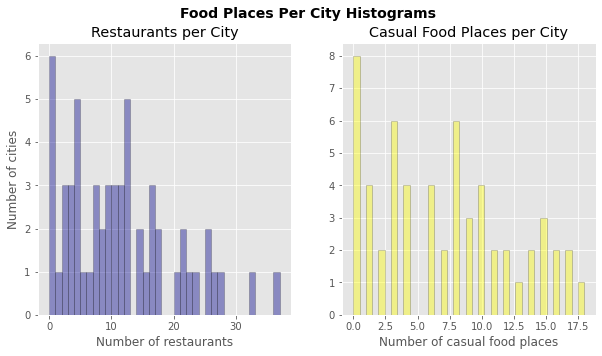

In [49]:
# Histogram of restaurants per city
fig, axes = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Food Places Per City Histograms',fontsize=14, fontweight='bold')

sns.distplot(toronto_grouped['Restaurant'], ax=axes[0],hist=True, kde=False, 
             bins=37, color = 'darkblue', 
             hist_kws={'edgecolor':'black'})

axes[0].set_title('Restaurants per City')
axes[0].set_xlabel('Number of restaurants')
axes[0].set_ylabel('Number of cities')

sns.distplot(toronto_grouped['Casual Food'], ax=axes[1], hist=True, kde=False, 
             bins=37, color = 'yellow', 
             hist_kws={'edgecolor':'black'})

axes[1].set_title('Casual Food Places per City')
axes[1].set_xlabel('Number of casual food places')

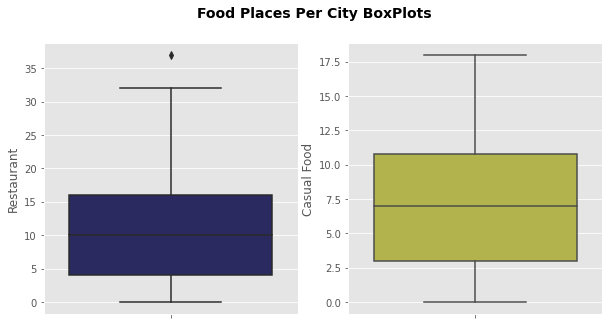

In [47]:
#Box plots
fig, axes = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Food Places Per City BoxPlots',fontsize=14, fontweight='bold')

sns.boxplot(y=toronto_grouped['Restaurant'],ax=axes[0], color = 'darkblue',saturation=0.4)
sns.boxplot(y=toronto_grouped['Casual Food'],ax=axes[1], color = 'yellow', saturation=0.4)

Text(0, 0.5, 'Number of cities')

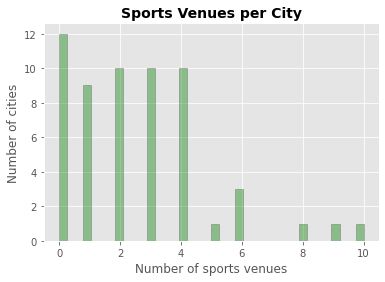

In [28]:
# Histogram of sports venues per city
sns.distplot(toronto_grouped['Sports'], hist=True, kde=False, 
             bins=38, color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4, 'shade': True})
plt.title('Sports Venues per City',fontsize=14, fontweight='bold')
plt.xlabel('Number of sports venues')
plt.ylabel('Number of cities')

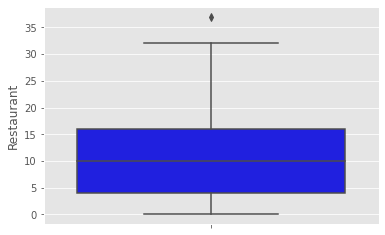

In [36]:
#Box plots
sns.boxplot(y=toronto_grouped['Restaurant'],color = 'blue')
